# DX 704 Week 3 Project

This week's project will give you practice with optimizing choices for bandit algorithms.
You will be given access to the bandit problem via a blackbox object, and you will investigate the bandit rewards to pick a suitable algorithm.

The full project description, a template notebook and supporting code are available on GitHub: [Project 3 Materials](https://github.com/bu-cds-dx704/dx704-project-03).


## Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Pick a Bandit Algorithm

Experiment with the multi-armed bandit interface using seed 0 to learn about the distribution of rewards and decide what kind of bandit algorithm will be appropriate.
A histogram will likely be helpful.

In [1]:
# DO NOT CHANGE

import numpy as np

class BanditProblem(object):
    def __init__(self, seed):
        self.seed = seed
        self.rng = np.random.default_rng(seed)

        self.num_arms = 3
        self.ns = self.rng.integers(low=1, high=10, size=self.num_arms)
        self.ps = self.rng.uniform(low=0.2, high=0.4, size=self.num_arms)

    def get_num_arms(self):
        return self.num_arms

    def get_reward(self, arm):
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm")

        x = self.rng.uniform()
        x *= self.rng.binomial(self.ns[arm], self.ps[arm])

        return x


In [2]:
bandit0 = BanditProblem(0)

In [3]:
bandit0.get_num_arms()

3

In [4]:
bandit0.get_reward(arm=0)

1.8255111545554434

Total reward for arm 0 over 1000 pulls: 814.9662861922193
Total reward for arm 1 over 1000 pulls: 572.2153257440685
Total reward for arm 2 over 1000 pulls: 926.6692709741491
Average reward for arm 0 over 1000 pulls: 0.8149662861922193
Average reward for arm 1 over 1000 pulls: 0.5722153257440685
Average reward for arm 2 over 1000 pulls: 0.9266692709741491
Standard deviation of rewards for arm 0 over 1000 pulls: 0.7839292863156498
Standard deviation of rewards for arm 1 over 1000 pulls: 0.6336468142887081
Standard deviation of rewards for arm 2 over 1000 pulls: 0.8479209343006736


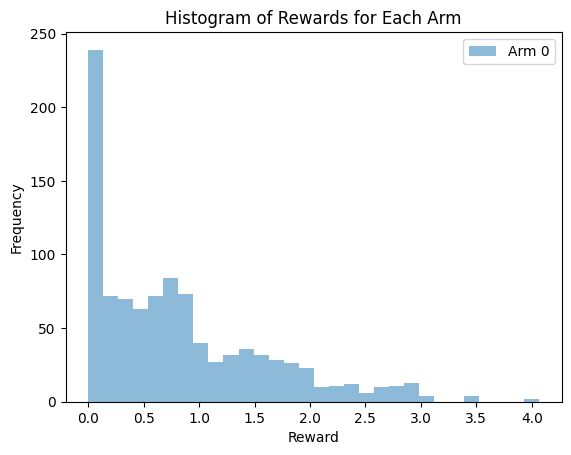

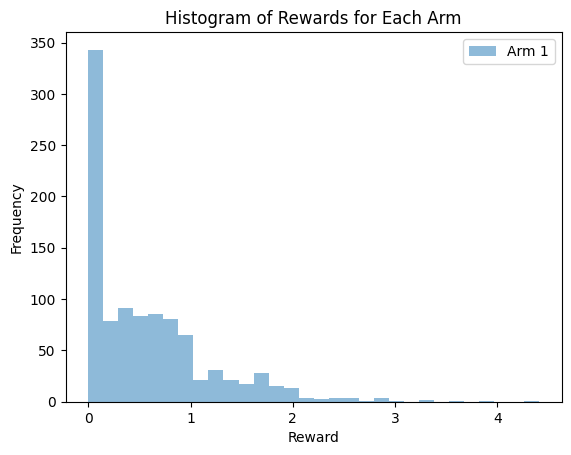

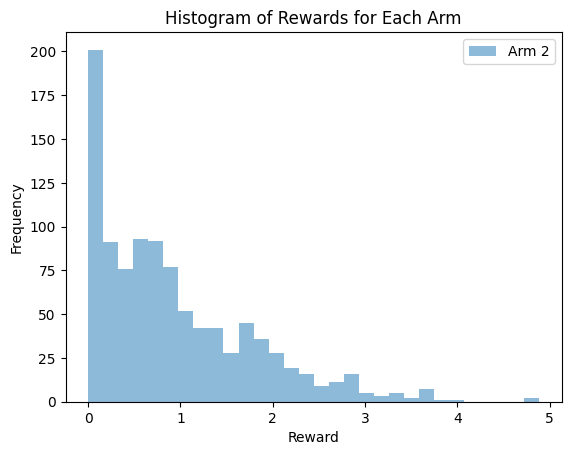

In [5]:
# YOUR CHANGES HERE
rewards0 = []
rewards1 = []
rewards2 = []
for arm in range(bandit0.get_num_arms()):
    for _ in range(1000):
        reward = bandit0.get_reward(arm)
        if arm == 0:
            rewards0.append(reward)
        elif arm == 1:
            rewards1.append(reward)
        else:
            rewards2.append(reward)

sum_rewards0 = sum(rewards0)
sum_rewards1 = sum(rewards1)
sum_rewards2 = sum(rewards2)

print(f"Total reward for arm 0 over 1000 pulls: {sum_rewards0}")
print(f"Total reward for arm 1 over 1000 pulls: {sum_rewards1}")
print(f"Total reward for arm 2 over 1000 pulls: {sum_rewards2}")

avg_reward0 = sum_rewards0 / 1000
avg_reward1 = sum_rewards1 / 1000
avg_reward2 = sum_rewards2 / 1000

print(f"Average reward for arm 0 over 1000 pulls: {avg_reward0}")
print(f"Average reward for arm 1 over 1000 pulls: {avg_reward1}")
print(f"Average reward for arm 2 over 1000 pulls: {avg_reward2}")

std_reward0 = np.std(rewards0)
std_reward1 = np.std(rewards1)
std_reward2 = np.std(rewards2)

print(f"Standard deviation of rewards for arm 0 over 1000 pulls: {std_reward0}")
print(f"Standard deviation of rewards for arm 1 over 1000 pulls: {std_reward1}")
print(f"Standard deviation of rewards for arm 2 over 1000 pulls: {std_reward2}")

# Plot histograms of the rewards for each arm
import matplotlib.pyplot as plt
plt.hist(rewards0, bins=30, alpha=0.5, label='Arm 0')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards for Each Arm')
plt.legend()
plt.show()

plt.hist(rewards1, bins=30, alpha=0.5, label='Arm 1')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards for Each Arm')
plt.legend()
plt.show()

plt.hist(rewards2, bins=30, alpha=0.5, label='Arm 2')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards for Each Arm')
plt.legend()
plt.show()

Based on your investigation, pick an appropriate bandit algorithm to implement from the algorithms covered this week.
Write a file "algorithm-choice.txt" that states your choice and give a single sentence justifying your choice and rejecting the alternatives.
Keep your explanation concise; you should be able to justify your choice solely based on the type of numbers observed, and whether those match the bandit algorithms that you have learned.

## Part 2: Implement Bandit

Based on your decision, implement an appropriate bandit algorithm and pick 1000 actions using seed 2026.

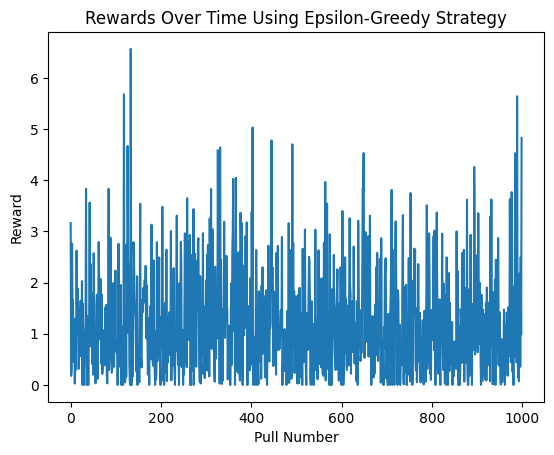

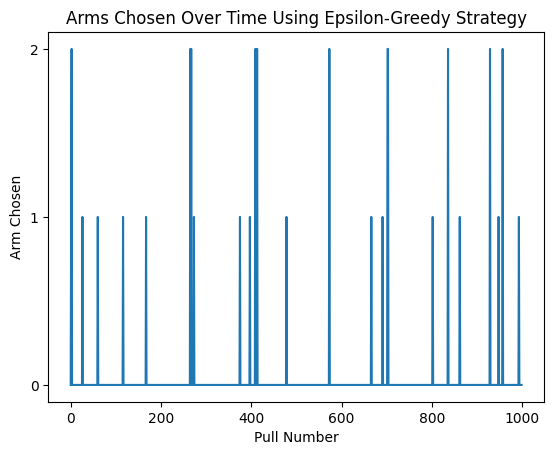

Total reward for arm 0 over 1000 pulls: 1187.5707215006994
Total reward for arm 1 over 1000 pulls: 5.137310421152616
Total reward for arm 2 over 1000 pulls: 0.8112588932706627
Average reward for arm 0 over 974 pulls: 1.2192717879883976
Average reward for arm 1 over 15 pulls: 0.3424873614101744
Average reward for arm 2 over 11 pulls: 0.07375080847915115
Standard deviation of rewards for arm 0 over 974 pulls: 1.0315107804022325
Standard deviation of rewards for arm 1 over 15 pulls: 0.4901532740400221
Standard deviation of rewards for arm 2 over 11 pulls: 0.14438842474943164


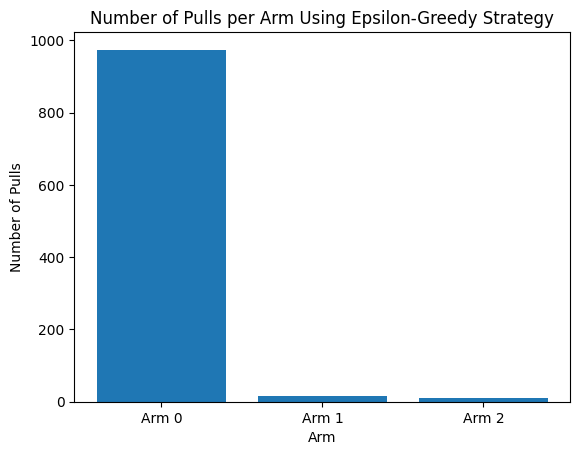

In [6]:
# YOUR CHANGES HERE

bandit2026 = BanditProblem(seed=2026)
total_pulls_so_far = 0
actions = []

avg_reward0 = 0
avg_reward1 = 0
avg_reward2 = 0

pulls_on_arm0 = 0
pulls_on_arm1 = 0
pulls_on_arm2 = 0

rewards0 = []
rewards1 = []
rewards2 = []
rewards_overall = []

score0 = 0
score1 = 0
score2 = 0

epsilon = 0.05
epsilon_rng = np.random.default_rng(2026)

reward0 = bandit2026.get_reward(0)
rewards0.append(reward0)
rewards_overall.append(reward0)
total_pulls_so_far += 1
pulls_on_arm0 += 1
avg_reward0 = reward0
score0 = avg_reward0
actions.append(0)

reward1 = bandit2026.get_reward(1)
rewards1.append(reward1)
rewards_overall.append(reward1)
total_pulls_so_far += 1
pulls_on_arm1 += 1
avg_reward1 = reward1
score1 = avg_reward1
actions.append(1)

reward2 = bandit2026.get_reward(2)
rewards2.append(reward2)
rewards_overall.append(reward2)
total_pulls_so_far += 1
pulls_on_arm2 += 1
avg_reward2 = reward2
score2 = avg_reward2
actions.append(2)

for _ in range(997):
    avg_reward0 = sum(rewards0) / pulls_on_arm0
    avg_reward1 = sum(rewards1) / pulls_on_arm1
    avg_reward2 = sum(rewards2) / pulls_on_arm2

    score0 = avg_reward0
    score1 = avg_reward1
    score2 = avg_reward2

    explore = epsilon_rng.uniform() < epsilon
    if explore:
        chosen_arm = int(epsilon_rng.integers(0, 3))
    else:
        if score0 >= score1 and score0 >= score2:
            chosen_arm = 0
        elif score1 >= score0 and score1 >= score2:
            chosen_arm = 1
        else:
            chosen_arm = 2

    if chosen_arm == 0:
        reward0 = bandit2026.get_reward(0)
        rewards0.append(reward0)
        total_pulls_so_far += 1
        pulls_on_arm0 += 1
        rewards_overall.append(reward0)
        actions.append(0)
    elif chosen_arm == 1:
        reward1 = bandit2026.get_reward(1)
        rewards1.append(reward1)
        total_pulls_so_far += 1
        pulls_on_arm1 += 1
        rewards_overall.append(reward1)
        actions.append(1)
    else:
        reward2 = bandit2026.get_reward(2)
        rewards2.append(reward2)
        total_pulls_so_far += 1
        pulls_on_arm2 += 1
        rewards_overall.append(reward2)
        actions.append(2)

total_reward0 = sum(rewards0)
total_reward1 = sum(rewards1)
total_reward2 = sum(rewards2)

# Plot rewards over time
plt.plot(rewards_overall)
plt.xlabel("Pull Number")
plt.ylabel("Reward")
plt.title("Rewards Over Time Using Epsilon-Greedy Strategy")
plt.show()

# Plot actions over time
plt.plot(actions)
plt.xlabel("Pull Number")
plt.ylabel("Arm Chosen")
plt.title("Arms Chosen Over Time Using Epsilon-Greedy Strategy")
plt.yticks([0, 1, 2])
plt.show()

print(f"Total reward for arm 0 over 1000 pulls: {total_reward0}")
print(f"Total reward for arm 1 over 1000 pulls: {total_reward1}")
print(f"Total reward for arm 2 over 1000 pulls: {total_reward2}")

avg_reward0 = total_reward0 / pulls_on_arm0
avg_reward1 = total_reward1 / pulls_on_arm1
avg_reward2 = total_reward2 / pulls_on_arm2

print(f"Average reward for arm 0 over {pulls_on_arm0} pulls: {avg_reward0}")
print(f"Average reward for arm 1 over {pulls_on_arm1} pulls: {avg_reward1}")
print(f"Average reward for arm 2 over {pulls_on_arm2} pulls: {avg_reward2}")

std_reward0 = np.std(rewards0)
std_reward1 = np.std(rewards1)
std_reward2 = np.std(rewards2)

print(f"Standard deviation of rewards for arm 0 over {pulls_on_arm0} pulls: {std_reward0}")
print(f"Standard deviation of rewards for arm 1 over {pulls_on_arm1} pulls: {std_reward1}")
print(f"Standard deviation of rewards for arm 2 over {pulls_on_arm2} pulls: {std_reward2}")

# Plot number of pulls per arm
plt.bar(["Arm 0", "Arm 1", "Arm 2"], [pulls_on_arm0, pulls_on_arm1, pulls_on_arm2])
plt.xlabel("Arm")
plt.ylabel("Number of Pulls")
plt.title("Number of Pulls per Arm Using Epsilon-Greedy Strategy")
plt.show()

actions_part2 = actions


Write a file "history.tsv" with columns action and reward in the order that the actions were taken.

In [7]:
# YOUR CHANGES HERE
import pandas as pd
history = pd.DataFrame({
    "action" : actions_part2,
    "reward" : rewards_overall
})

history.to_csv("history.tsv", index=False, sep="\t")

Submit "history.tsv" in Gradescope.

## Part 3: Action Statistics

Based on the data from part 2, estimate the expected reward for each arm and write a file "actions.tsv" with the columns action, min_reward, mean_reward, max_reward.

In [8]:
# YOUR CHANGES HERE
arms = [0, 1, 2]

min_reward0 = min(rewards0)
min_reward1 = min(rewards1)
min_reward2 = min(rewards2)

print(f"Minimum reward for arm 0 over {pulls_on_arm0} pulls: {min_reward0}")
print(f"Minimum reward for arm 1 over {pulls_on_arm1} pulls: {min_reward1}")
print(f"Minimum reward for arm 2 over {pulls_on_arm2} pulls: {min_reward2}")

mean_reward0 = np.mean(rewards0)
mean_reward1 = np.mean(rewards1)
mean_reward2 = np.mean(rewards2)

print(f"Mean reward for arm 0 over {pulls_on_arm0} pulls: {mean_reward0}")
print(f"Mean reward for arm 1 over {pulls_on_arm1} pulls: {mean_reward1}")
print(f"Mean reward for arm 2 over {pulls_on_arm2} pulls: {mean_reward2}")

max_reward0 = max(rewards0)
max_reward1 = max(rewards1)
max_reward2 = max(rewards2)

print(f"Maximum reward for arm 0 over {pulls_on_arm0} pulls: {max_reward0}")
print(f"Maximum reward for arm 1 over {pulls_on_arm1} pulls: {max_reward1}")
print(f"Maximum reward for arm 2 over {pulls_on_arm2} pulls: {max_reward2}")

actions = pd.DataFrame({
    "action": arms,
    "min_reward": [min_reward0, min_reward1, min_reward2],
    "mean_reward": [mean_reward0, mean_reward1, mean_reward2],
    "max_reward": [max_reward0, max_reward1, max_reward2]   
})

actions.to_csv("actions.tsv", index=False, sep="\t")

Minimum reward for arm 0 over 974 pulls: 0.0
Minimum reward for arm 1 over 15 pulls: 0.0
Minimum reward for arm 2 over 11 pulls: 0.0
Mean reward for arm 0 over 974 pulls: 1.2192717879883974
Mean reward for arm 1 over 15 pulls: 0.3424873614101744
Mean reward for arm 2 over 11 pulls: 0.07375080847915115
Maximum reward for arm 0 over 974 pulls: 6.564312482579681
Maximum reward for arm 1 over 15 pulls: 1.472737048004277
Maximum reward for arm 2 over 11 pulls: 0.4416977351221908


Submit "actions.tsv" in Gradescope.

## Part 4: Regret Estimates

Estimate the regret taking 1000 actions with the following strategies.

* uniform: Pick an arm uniformly at random.
* just-i: Always pick arm $i$. Do this for $i=0$ to $K-1$ where $K$ is the number of arms.
* actual: This should match your output in part 2.

These estimates should be based on your previous action statistics; you should not use the true action values from the bandit code.

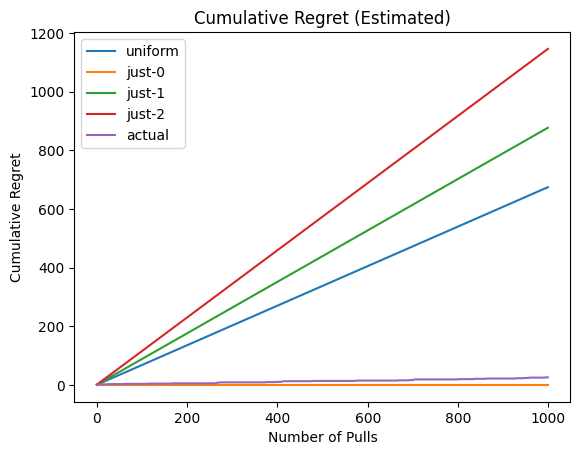

In [9]:
# YOUR CHANGES HERE

num_pulls = 1000

mean_rewards = [mean_reward0, mean_reward1, mean_reward2]
num_arms = len(mean_rewards)

best_mean_reward = max(mean_rewards)

uniform_mean_reward = sum(mean_rewards) / num_arms

regret_uniform = [best_mean_reward - uniform_mean_reward] * num_pulls
regret_just_0 = [best_mean_reward - mean_rewards[0]] * num_pulls
regret_just_1 = [best_mean_reward - mean_rewards[1]] * num_pulls
regret_just_2 = [best_mean_reward - mean_rewards[2]] * num_pulls

regret_ucb = []
for action in actions_part2:
    regret_ucb.append(best_mean_reward - mean_rewards[action])

plt.plot(np.cumsum(regret_uniform), label="uniform")
plt.plot(np.cumsum(regret_just_0), label="just-0")
plt.plot(np.cumsum(regret_just_1), label="just-1")
plt.plot(np.cumsum(regret_just_2), label="just-2")
plt.plot(np.cumsum(regret_ucb), label="actual")
plt.xlabel("Number of Pulls")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret (Estimated)")
plt.legend()
plt.show()

Write your results to a file "strategies.tsv" with the columns strategy and regret.

In [10]:
# YOUR CHANGES HERE

strats = ["uniform", "just-0", "just-1", "just-2", "actual"]
strategies = pd.DataFrame({
    "strategy": strats,
    "regret": [sum(regret_uniform), sum(regret_just_0), sum(regret_just_1), sum(regret_just_2), sum(regret_ucb)]
})
strategies.to_csv("strategies.tsv", index=False, sep="\t")


Submit "strategies.tsv" in Gradescope.

## Part 5: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

## Part 6: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.

Submit "project.ipynb" in Gradescope.